### DEMAPP01 
# Approximating functions on R

This demo illustrates how to use CompEcon Toolbox routines to construct and operate with an approximant for a function defined on an interval of the real line.

In particular, we construct an approximant for $f(x)=\exp(-x)$ on the interval $[-1,1]$.  The function used in this illustration posseses a closed-form, which will allow us to measure approximation error precisely. Of course, in practical applications, the function to be approximated will not possess a known closed-form.

In order to carry out the exercise, one must first code the function to be approximated at arbitrary points.
Let's begin:

In [1]:
from demos.setup import np, plt, demofigure
from compecon import BasisChebyshev, BasisSpline, nodeunif
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

### Preliminary tasks

Function to be approximated

In [2]:
def f(x): return np.exp(-x)

Set the endpoints of approximation interval:

In [3]:
a = -1  # left endpoint
b = 1   # right endpoint

Choose an approximation scheme.

#### Chebyshev interpolation

In this case, let us use an order 10 Chebychev approximation scheme:

In [4]:
n = 10  # order of approximation
F = BasisChebyshev(n, a, b, f=f)

One may now evaluate the approximant at any point x calling the basis:

In [5]:
x = 0
y = F(x)
print('\nThe approximate value of exp(-x) at x=0 is {:.15f}'.format(y))
print("The  'exact'  value  of  exp(-x) at x=0 is {:.15f}".format(1))


The approximate value of exp(-x) at x=0 is 1.000000000548514
The  'exact'  value  of  exp(-x) at x=0 is 1.000000000000000


... one may also evaluate the approximant's first and second derivatives at x:

In [6]:
d1 = F(x, 1)
d2 = F(x, 2)
print('\nThe approximate first derivative of exp(-x) at x=0 is {:.15f}'.format(d1))
print("The  'exact'  first  derivative  of exp(-x) at x=0 is {:.15f}".format(-1))
print('\nThe approximate second derivative of exp(-x) at x=0 is {:.15f}'.format(d2))
print("The  'exact'  second  derivative of  exp(-x) at x=0 is {:.15f}".format(1))


The approximate first derivative of exp(-x) at x=0 is -1.000000000049717
The  'exact'  first  derivative  of exp(-x) at x=0 is -1.000000000000000

The approximate second derivative of exp(-x) at x=0 is 0.999999945156854
The  'exact'  second  derivative of  exp(-x) at x=0 is 1.000000000000000


... and one may even evaluate the approximant's definite integral between the left endpoint a and x:

In [7]:
int = F(x, -1)
print('\nThe approximate integral of exp(-x) between x=-1 and x=0 is {:.15f}'.format(int))
print("The  'exact'  integral  of  exp(-x) between x=-1 and x=0 is {:.15f}".format(np.exp(1) - 1))


The approximate integral of exp(-x) between x=-1 and x=0 is 1.718281828464635
The  'exact'  integral  of  exp(-x) between x=-1 and x=0 is 1.718281828459045


One may evaluate the accuracy of the Chebychev polynomial approximant by computing the approximation error on a highly refined grid of points:

In [8]:
ngrid = 5001  # number of grid nodes
xgrid = np.linspace(a, b, ngrid)    # generate refined grid for plotting
yapp = F(xgrid)                     # approximant values at grid nodes
yact = f(xgrid)                     # actual function values at grid points

Plot approximation error

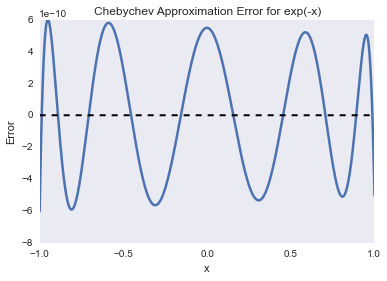

In [9]:
demofigure('Chebychev Approximation Error for exp(-x)', 'x', 'Error')
plt.plot(xgrid, yapp - yact)
plt.plot(xgrid, np.zeros_like(xgrid), 'k--', linewidth=2)

The plot indicates that an order 10 Chebychev approximation scheme, produces approximation errors no bigger in magnitude than 6x10^-10. The approximation error exhibits the "Chebychev equioscillation property", oscilating relatively uniformly throughout the approximation domain.

This commonly occurs when function being approximated is very smooth, as is the case here but should not be expected when the function is not smooth.  Further notice how the approximation error is exactly 0 at the approximation nodes --- which is true by contruction.

#### Cubic spline interpolation

Let us repeat the approximation exercise, this time constructing a 21-function cubic spline approximant:

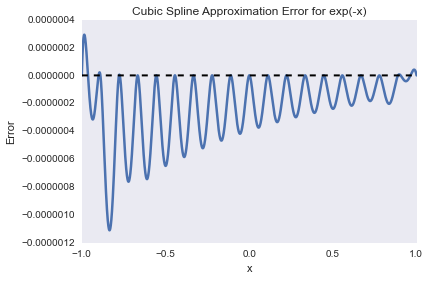

In [10]:
n = 21                         # order of approximation
S = BasisSpline(n, a, b, f=f)  # define basis
yapp = S(xgrid)                # approximant values at grid nodes

# plot approximation error
demofigure('Cubic Spline Approximation Error for exp(-x)', 'x', 'Error')          
plt.plot(xgrid, yapp - yact)
plt.plot(xgrid, np.zeros_like(xgrid), 'k--', linewidth=2)

The plot indicates that an order 21 cubic spline approximation scheme produces approximation errors no bigger in magnitude than 1.2x10^-6, about four orders of magnitude worse than with Chebychev polynomials.

#### Linear spline interpolation

Let us repeat the approximation exercise, this time constructing a 31-function linear spline approximant:

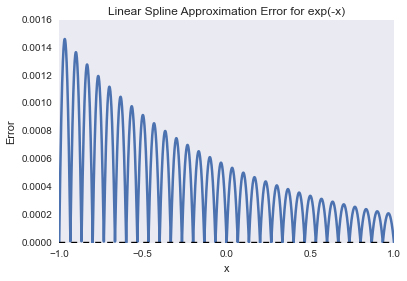

In [11]:
n = 31                             # order of approximation
L = BasisSpline(n, a, b, k=1, f=f) # define basis functions
yapp = L(xgrid)                    # fitted values at grid nodes

# plot approximation error
demofigure('Linear Spline Approximation Error for exp(-x)', 'x', 'Error')
plt.plot(xgrid, yapp - yact)
plt.plot(xgrid, np.zeros_like(xgrid), 'k--', linewidth=2)

The plot indicates that an order 41 linear spline approximation scheme produces approximation errors no bigger in magnitude than 1.5x10^-2, about five orders of magnitude worse than with Chebychev polynomials.